In [93]:
#importing packages
import inline as inline
import matplotlib as matplotlib
#%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [94]:
df = pd.read_csv('creditcard.csv')

In [95]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [96]:
print(df.sample (6))

            Time        V1        V2        V3        V4        V5        V6  \
219084  141593.0  2.143232  0.008941 -2.859293 -0.252971  1.217121 -0.765070   
179972  124317.0  2.046854 -0.113720 -1.207962  0.209184  0.101103 -0.666678   
218161  141191.0 -2.857621 -0.307727  1.521266  4.500119  1.812809  2.276221   
98164    66546.0 -2.953217 -2.202471  1.672363  1.498057  2.160183 -0.872777   
138395   82631.0  1.053965 -0.217483  0.892843  1.057895 -0.655405  0.425579   
69234    53329.0 -1.292548  0.029394  1.014434  1.009635 -1.058549  1.479998   

              V7        V8        V9  ...       V21       V22       V23  \
219084  0.801476 -0.348714  0.028363  ...  0.282008  0.914090 -0.248679   
179972  0.071074 -0.160971  0.313772  ... -0.263610 -0.661260  0.279972   
218161 -0.425395  0.895603 -1.564402  ... -0.610780 -0.590631  1.374592   
98164   0.233569 -0.023782  0.069346  ... -0.191986  0.591033  2.200406   
138395 -0.698016  0.422825  0.477130  ...  0.080918  0.073909 -0

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [98]:
#numerical summary -> only non-anonymized columns of interest
#pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

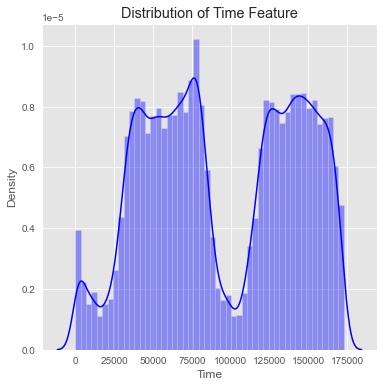

In [99]:
#visualizations of time and amount
plt.figure(figsize=(6,6))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time , color= 'b')

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

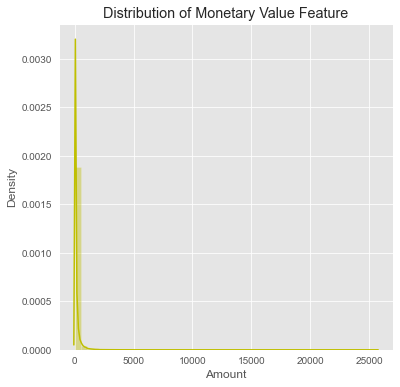

In [100]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount , color='y')

In [101]:
#fraud vs. normal transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

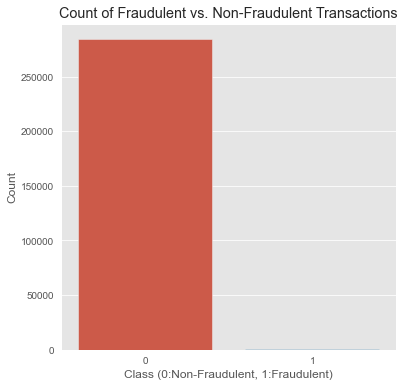

In [102]:
plt.figure(figsize=(6,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [103]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Text(0.5, 1.0, 'Heatmap of Correlation')

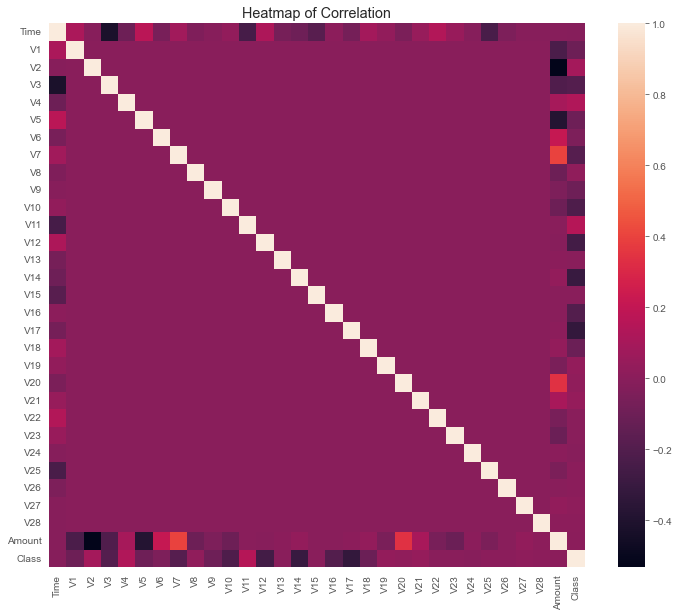

In [104]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [105]:
#skewness
skew_ = df.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [107]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [108]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
200090,133280.0,-2.397730,3.108684,-2.711764,1.738424,2.936754,4.816204,-1.309642,-3.385026,-1.800775,...,0.835299,0.573091,-0.360903,-0.101630,-0.629277,-0.212967,14.12,0,-0.296776,0.810017
141824,84500.0,1.284909,-0.529088,0.417300,-1.099777,-0.710041,0.127272,-0.791935,0.264308,1.848451,...,-0.176633,-0.863904,0.579289,-0.626478,0.079476,0.010225,1.00,0,-0.349231,-0.217188
167849,118921.0,0.231113,0.695262,-1.851709,-0.881210,2.337479,0.857422,1.670019,-0.153279,-0.456756,...,-0.055059,-1.765797,-1.595892,0.457853,-0.096486,0.049300,29.98,0,-0.233367,0.507646
47379,43191.0,0.976952,-0.063527,0.533990,1.588169,-0.535242,-0.477449,0.147510,-0.041044,0.325698,...,-0.058735,0.603983,0.545407,-0.351696,0.022561,0.033669,85.90,0,-0.009794,-1.087070
266731,162467.0,-1.041913,0.164585,1.007179,1.133390,-0.164048,-0.170488,-0.149588,0.685488,-0.376983,...,0.325079,-0.083535,-0.932771,-0.906167,0.117392,0.052949,80.49,0,-0.031423,1.424635


In [109]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [110]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256399, 31)
Test Shape: (28408, 31)


In [111]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [112]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 444 fraudulent transactions in the train data.


In [113]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [114]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
8619,-0.781022,1.130299,1.096729,-0.193898,1.109563,1.575887,0.135781,0.628293,0.834713,-0.589870,...,-0.353780,0.074630,-1.461061,-0.436269,0.169740,0.395231,0.122853,0,-0.348072,-1.693075
187750,2.096716,-0.038781,-1.695542,0.000521,0.418596,-0.995703,0.460324,-0.442981,0.559512,-0.148100,...,-0.280584,0.075953,-0.613699,0.150579,-0.042865,-0.047769,-0.064543,0,-0.269270,0.892754
98392,-3.105173,1.989771,-1.951125,-1.609954,1.248491,3.170187,-1.464843,1.534650,-0.598247,-0.603119,...,-0.611325,0.010876,1.010345,-0.106657,0.095123,-1.677401,-0.609465,0,-0.313289,-0.494563
90596,-0.518682,0.978721,1.413964,-0.463082,0.108058,-1.089595,0.904875,-0.081567,-0.343419,-0.973666,...,-0.699198,-0.002713,0.302559,-0.371301,-0.111943,0.056364,0.136276,0,-0.293338,-0.573531
11187,1.236051,0.350173,0.079771,0.526645,0.373797,0.265203,-0.204089,0.055085,1.108228,-0.527848,...,-0.945490,0.051484,-0.946952,0.207158,0.121749,-0.037878,0.001955,0,-0.349671,-1.536741


In [115]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [116]:
subsample = pd.concat([selected, fraud])
len(subsample)

888

In [117]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.950654,1.156170,1.706320,0.617770,-0.202484,0.465604,-0.022517,0.787325,-0.880554,-0.495688,...,-0.361126,-0.104592,-0.372702,0.053680,-0.451489,-0.028483,0.008972,0,-0.293258,-0.504924
1,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,...,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1,-0.337637,1.278661
2,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,-4.155838,...,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,1,2.855315,-1.117562
3,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,1.922075,-4.026180,-13.691315,...,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,1,-0.350191,-1.135482
4,-2.511931,2.205363,1.231064,-0.871250,-0.085133,-1.085694,0.781666,-0.101977,0.740128,1.440480,...,-0.839544,-0.177780,0.353633,0.570870,0.035402,0.612191,0.528680,0,-0.327442,-0.774592
5,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,-12.695947,...,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,1,-0.114624,-1.126785
6,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,-4.077585,...,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1,-0.349231,-1.106949
7,1.928467,-0.035685,-2.136753,0.853329,1.569318,1.332774,0.193657,0.307678,0.086189,0.318876,...,0.554973,0.024069,-0.961586,0.314107,-0.408357,0.017501,-0.084242,0,-0.324883,-0.125144
8,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,-13.088891,...,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1,-0.349231,-1.565927
9,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,-5.653638,...,-0.301432,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999,1,-0.349231,1.023839


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

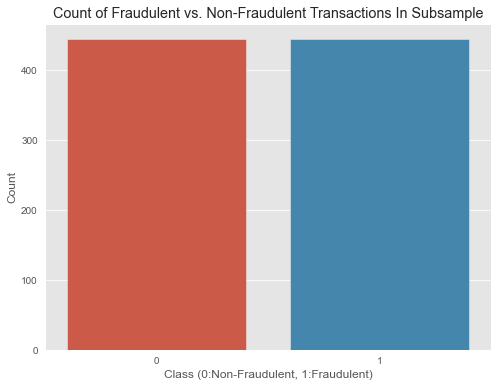

In [118]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [119]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.427207
V2,0.481482
V3,-0.568728
V4,0.710470
V5,-0.373185
V6,-0.398720
V7,-0.470708
V8,0.052271
V9,-0.565720
V10,-0.623340


In [120]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.568728
V9,-0.565720
V10,-0.623340
V12,-0.683555
V14,-0.744645
V16,-0.600803
V17,-0.563882


In [121]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.710470
V11,0.687524
Class,1.000000


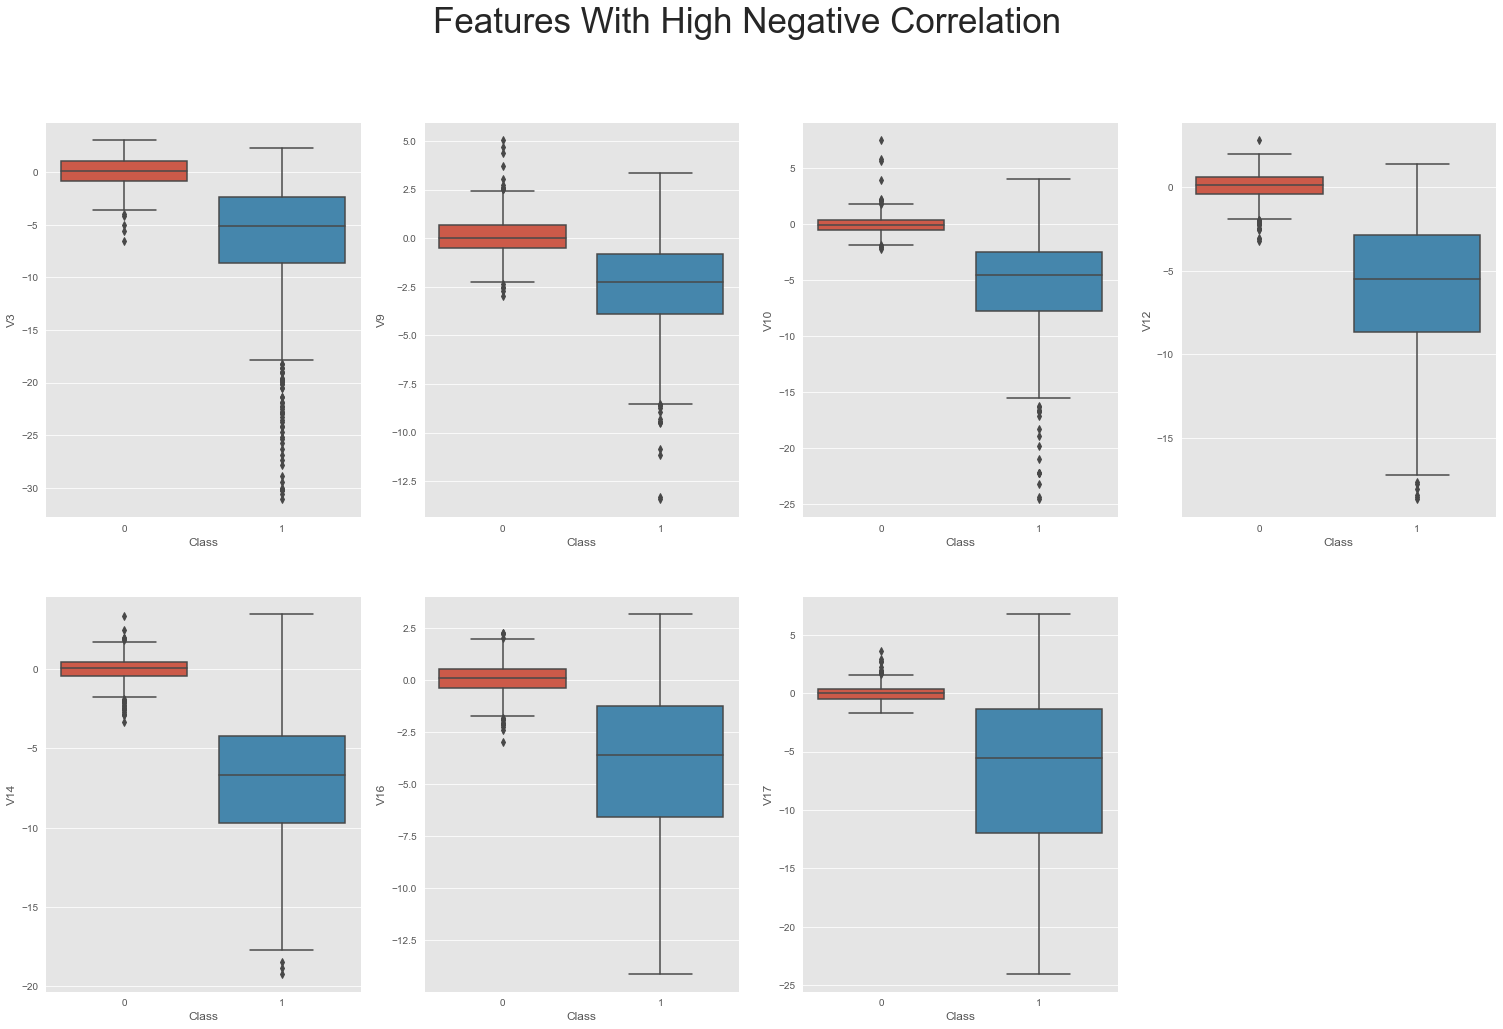

In [122]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

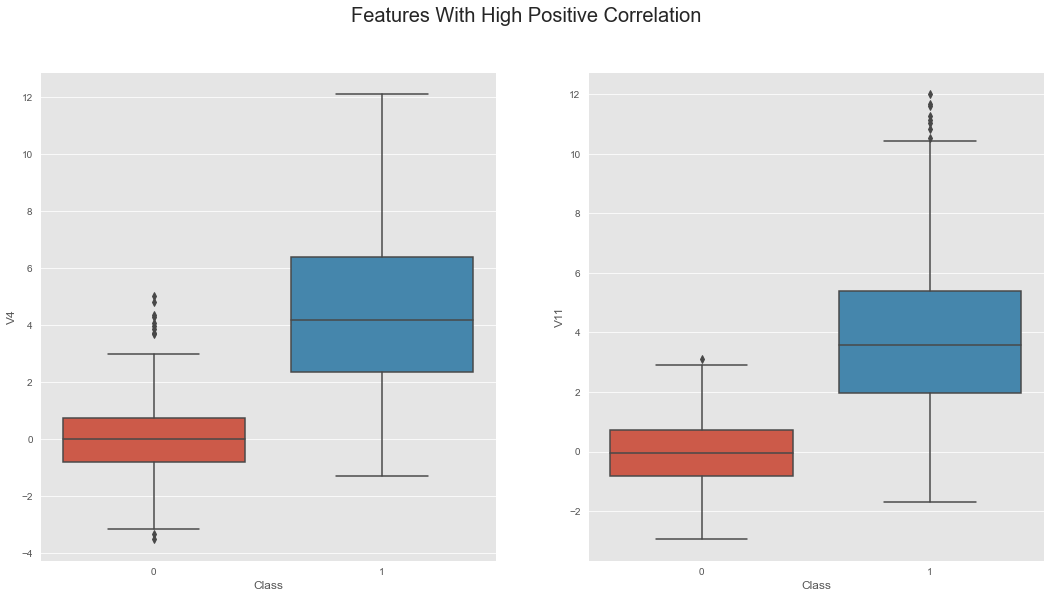

In [123]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [124]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [125]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 888 transactions by 264 transactions to 624 transactions.


In [126]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [127]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

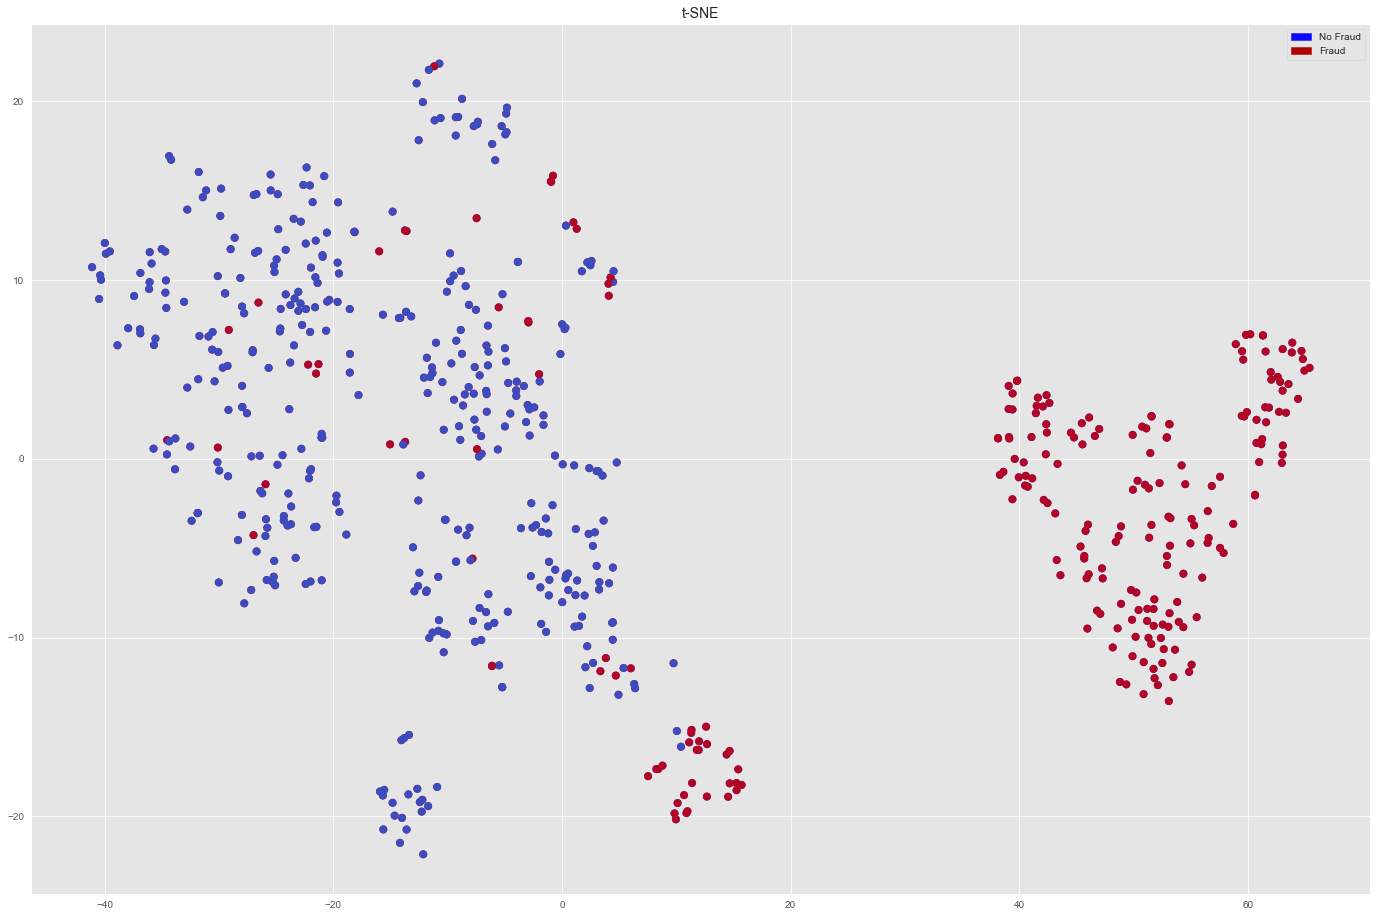

In [128]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [129]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [130]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [132]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (499, 30) (125, 30) 

Y_shapes:
 Y_train: Y_validation:
 (499,) (125,)


In [133]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [134]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.964206 (0.034732)
LDA: 0.967058 (0.024925)
KNN: 0.955763 (0.038984)
CART: 0.899771 (0.040507)
SVM: 0.970777 (0.030018)
XGB: 0.975661 (0.020219)
RF: 0.971780 (0.032010)


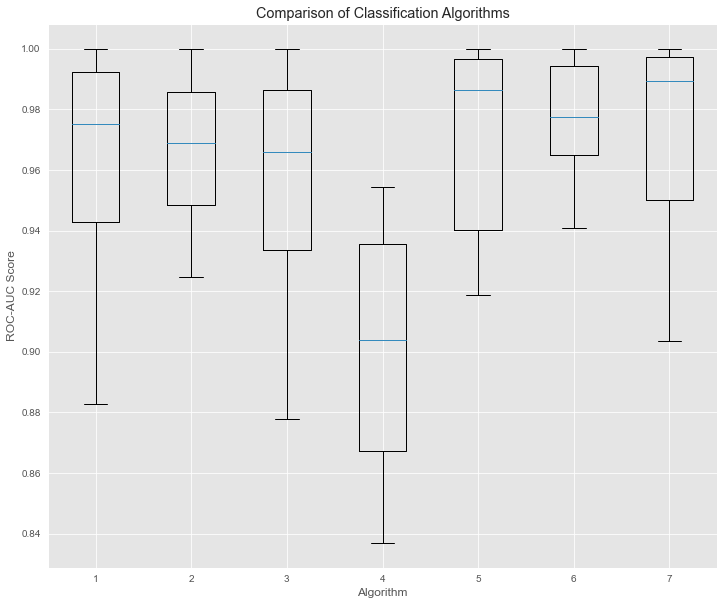

In [135]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
#ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [136]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified